# Import libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import config
import os

In [25]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# CAG

In [4]:
CAG = pd.read_csv(os.path.join(config.CLEAN_DIR, "reduced_CAG_profiles_clean.tsv"), sep="\t", index_col=0)
CAG

,CAG001,CAG002,CAG003,CAG004,CAG005,CAG006,CAG007,CAG008,CAG009,CAG010,...,CAG195,CAG196,CAG197,CAG198,CAG199,CAG200,CAG201,CAG202,CAG203,CAG204
id,,,,,,,,,,,,,,,,,,,,,
magic.0001,84.6957,24.7121,80.5436,0.0000,0.00000,59.51990,58.90410,5.75658,85.61240,0.0000,...,5.029450,6.675210,89.936500,8.08929,11.67530,92.738400,0.0000,0.412461,0.000,2.99918
magic.0004,75.3263,23.9936,72.3854,0.0000,0.00000,53.42200,57.96680,5.87649,85.38520,0.0000,...,2.753700,33.031900,106.106000,6.74747,14.39790,81.469000,0.0000,0.631978,0.000,3.53351
magic.0006,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.947394,1.173000,0.000000,2.76549,0.00000,6.741630,0.0000,0.233401,0.000,0.00000
magic.0007,196.3260,144.0190,119.4840,0.0000,0.00000,51.22350,88.90270,87.96830,179.89400,0.0000,...,13.144200,707.792000,165.973000,6.79055,39.92110,133.572000,0.0000,15.647300,0.000,9.04476
magic.0008,29.8060,20.9424,17.6686,0.0000,0.00000,5.05847,12.41530,5.47303,27.11860,0.0000,...,3.898820,114.057000,24.938400,1.41276,5.02784,30.311800,0.0000,0.523418,0.000,2.55794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0000,0.0000,0.0000,90.7312,95.97420,0.00000,8.17996,7.34976,7.54148,221.9390,...,0.000000,3.210610,0.000000,0.00000,0.00000,0.000000,692.9340,0.282325,716.754,0.00000
magic.6597,0.0000,0.0000,0.0000,7.0922,8.91412,0.00000,0.00000,0.00000,0.00000,27.9149,...,0.000000,0.000000,0.000000,0.00000,4.69484,0.000000,1189.9900,0.000000,551.656,0.00000
magic.6598,0.0000,0.0000,0.0000,22.1675,27.77780,0.00000,0.00000,0.00000,0.00000,52.2399,...,0.000000,0.515383,0.382749,0.91210,0.00000,0.000000,695.2750,0.201981,218.641,0.00000


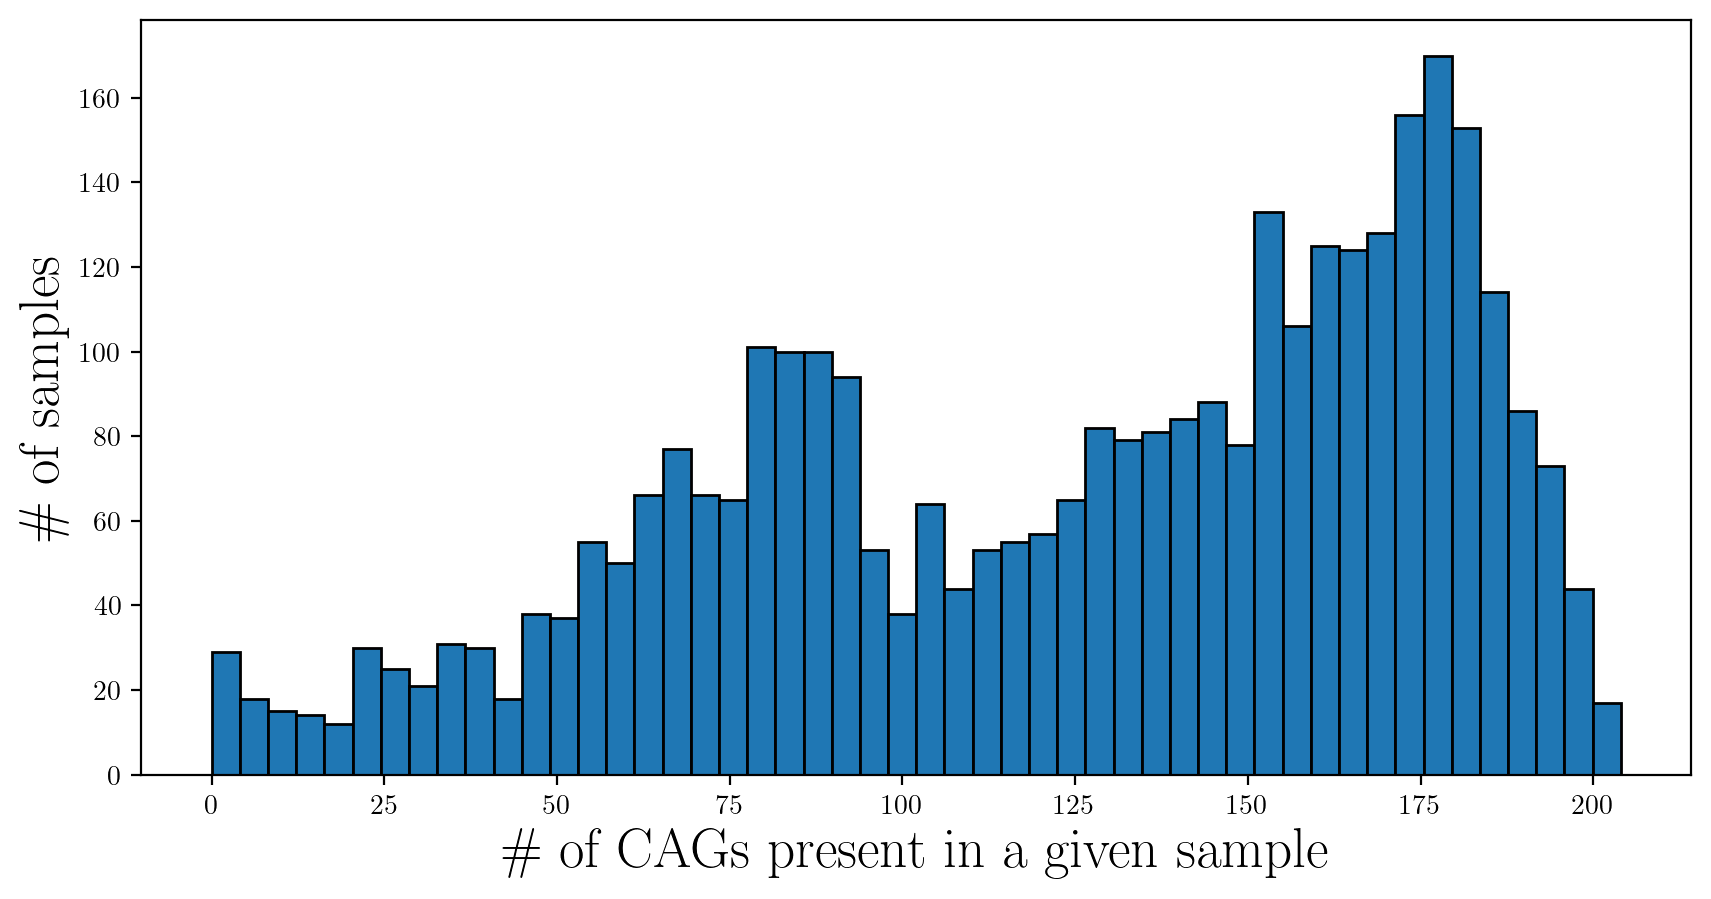

In [5]:
plt.figure(figsize=(10, 5), dpi=200)

CAG_presence = (CAG > 0)
counts = CAG_presence.sum(axis=1)

plt.hist(counts, bins=50, edgecolor="black")
plt.xlabel("\# of CAGs present in a given sample", fontsize=20)
plt.ylabel("\# of samples", fontsize=20)

plt.show()

In [7]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "reduced_CAG_clusters.tsv"), sep="\t", index_col=0)
clusters

,UniRef90_A0A376TU80
CAG001,
CAG001,UniRef90_A0A0H8R7I8
CAG001,UniRef90_D7ZK56
CAG001,UniRef90_W1XM67
CAG001,UniRef90_A0A2T1MLN5
CAG001,UniRef90_A0A2I6QK40
...,...
CAG202,UniRef90_A0A376PMS5
CAG203,UniRef90_D4JTZ5
CAG203,UniRef90_D4C6N2


Text(0, 0.5, '\\# of genes in CAG (log10)')

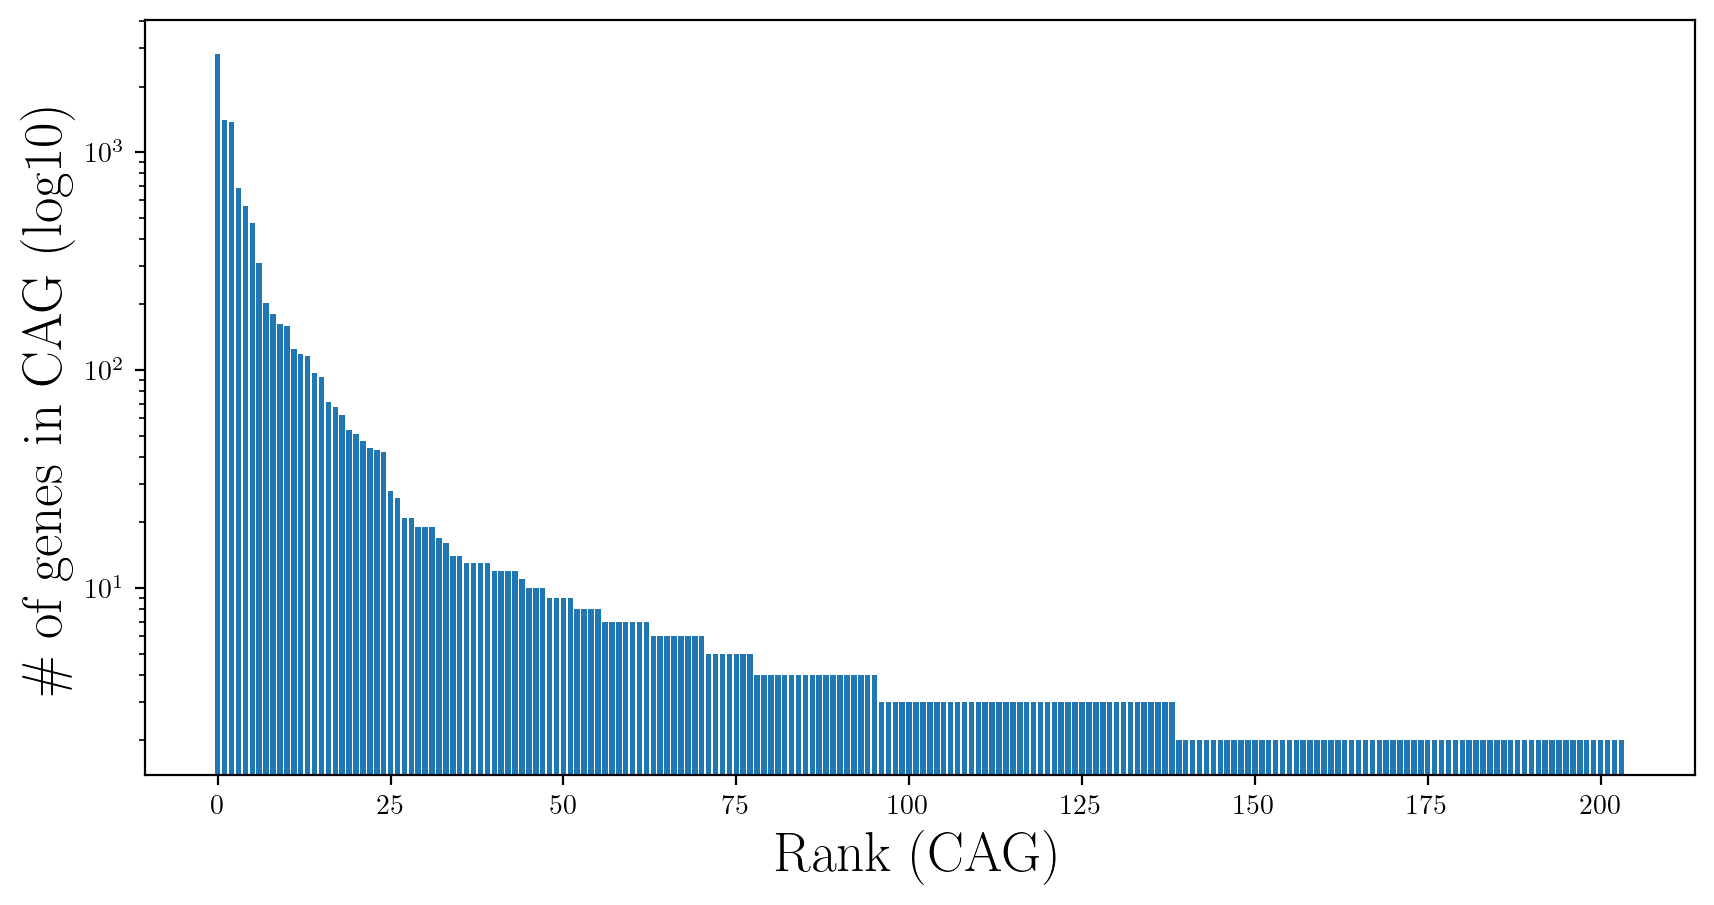

In [28]:
plt.figure(figsize=(10, 5), dpi=200)
counts = clusters.groupby(level=0).count()
num_cags = counts.shape[0]
plt.bar(range(num_cags), counts.values.flatten())
plt.yscale("log")
plt.xlabel("Rank (CAG)", fontsize=20)
plt.ylabel("\# of genes in CAG (log10)", fontsize=20)